In [1]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# checking the df data types per each column
market_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, bitcoin to digibyte
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price_change_percentage_24h   41 non-null     float64
 1   price_change_percentage_7d    41 non-null     float64
 2   price_change_percentage_14d   41 non-null     float64
 3   price_change_percentage_30d   41 non-null     float64
 4   price_change_percentage_60d   41 non-null     float64
 5   price_change_percentage_200d  41 non-null     float64
 6   price_change_percentage_1y    41 non-null     float64
dtypes: float64(7)
memory usage: 2.6+ KB


### Prepare the Data

In [7]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
market_data_scaled = scaler.fit_transform(market_data_df)


In [10]:
# Create a DataFrame with the scaled data
market_data_scaled_df = pd.DataFrame(market_data_scaled, columns = market_data_df.columns)
market_data_scaled_df.head()

# Copy the crypto names from the original data
crypto_names = market_data_df.index

# Set the coinid column as index
market_data_scaled_df.set_index(crypto_names, inplace=True)

# Display sample data
market_data_scaled_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [13]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11 / 
# liz comment: instructions unclear if you wanted include 11 or exclude 11, I chose to include 11 below. 
k = list(range(1,12))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    # 2. Fit the model to the data using the scaled DataFrame
    # 3. Append the model.inertia_ to the inertia list

for i in k:
    model = KMeans(n_clusters=i, n_init="auto")
    model.fit(market_data_scaled_df)
    inertia.append(model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df.head()


,k,inertia
0,1,287.000000
1,2,235.816943
2,3,123.190482
3,4,79.022435
4,5,70.884094


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

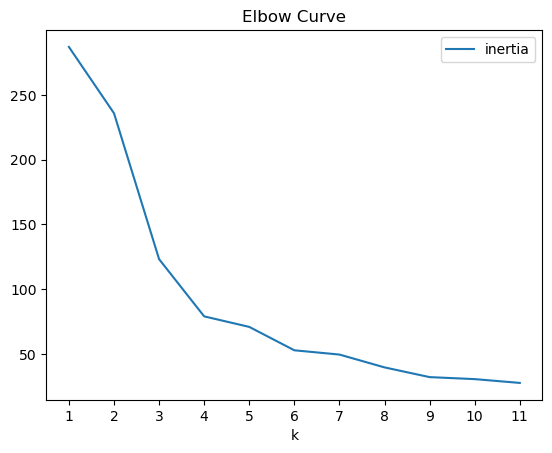

In [14]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_df.plot.line(x="k",
                   y="inertia",
                   title="Elbow Curve",
                   xticks=k)

In [15]:
# validate rate of decrease for each K value numerically: 

k = elbow_data['k']
inertia = elbow_data['inertia']
for i in range (1,len(k)):
    percent_decrease = (inertia[i-1]-inertia[i]) / inertia[i-1]*100
    print(f"Percentage decrease from k={k[i-1]} to k={k[i]}: {percent_decrease:.2f}%")


Percentage decrease from k=1 to k=2: 17.83%
Percentage decrease from k=2 to k=3: 47.76%
Percentage decrease from k=3 to k=4: 35.85%
Percentage decrease from k=4 to k=5: 10.30%
Percentage decrease from k=5 to k=6: 25.47%
Percentage decrease from k=6 to k=7: 6.23%
Percentage decrease from k=7 to k=8: 20.00%
Percentage decrease from k=8 to k=9: 18.94%
Percentage decrease from k=9 to k=10: 4.81%
Percentage decrease from k=10 to k=11: 9.59%


#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** The rate of decrease in inertia begins to slow down at k = 4, therefore our elbow point is at k = 4. 

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [16]:
# Initialize the K-Means model using the best value for k
kmodel = KMeans(n_clusters=4, n_init="auto")


In [18]:
# Fit the K-Means model using the scaled data
kmodel.fit(market_data_scaled_df)

KMeans(n_clusters=4, n_init='auto')

In [21]:
# Predict the clusters to group the cryptocurrencies using the scaled data
k_4 = kmodel.predict(market_data_scaled_df)

# View the resulting array of cluster values.
display(k_4[:10])

array([0, 0, 3, 3, 0, 0, 0, 0, 0, 3])

In [24]:
# Create a copy of the DataFrame
market_data_prediction_df = market_data_scaled_df.copy()

In [25]:
# Add a new column to the DataFrame with the predicted clusters
market_data_prediction_df['crypto_cluster'] = k_4

# Display sample data
market_data_prediction_df.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,crypto_cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,3
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,3
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


<Axes: title={'center': 'Scatter Plot by Crypto Clusters'}, xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

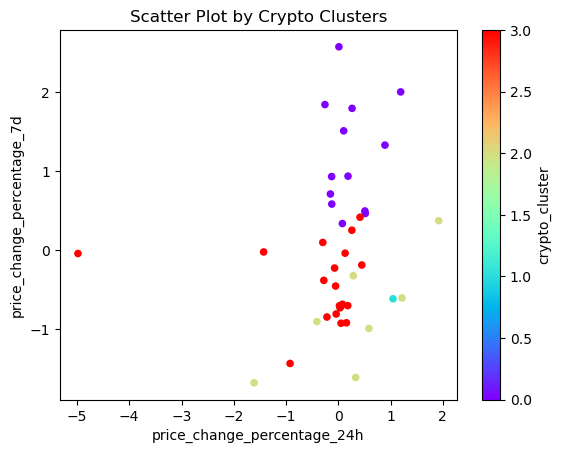

In [27]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.

market_data_prediction_df.plot.scatter(x="price_change_percentage_24h",
                                        y="price_change_percentage_7d", 
                                        c = "crypto_cluster", 
                                        title = "Scatter Plot by Crypto Clusters", 
                                        colormap = "rainbow" )


### Optimize Clusters with Principal Component Analysis.

In [28]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [30]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
crypto_pca = pca.fit_transform(market_data_scaled_df)

# View the first five rows of the DataFrame. 
crypto_pca[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [34]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
pvr = pca.explained_variance_ratio_
display(f"Explained Variance Ratio = {pvr}")
display(f"Total of the three components = {sum(pvr)}")

'Explained Variance Ratio = [0.3719856  0.34700813 0.17603793]'

'Total of the three components = 0.8950316570309841'

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance of the three principal components is approximately 89.5%.

In [35]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you
# liz comment: I could not find this code that "was provided for me."

# Creating a DataFrame with the PCA data
crypto_pca_df = pd.DataFrame(
    crypto_pca,
    columns=["PCA1", "PCA2", "PCA3"]
)


# Copy the crypto names from the original data
crypto_names = market_data_df.index


# Set the coinid column as index
crypto_pca_df.set_index(crypto_names, inplace=True)

# Display sample data
crypto_pca_df

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


### Find the Best Value for k Using the PCA Data

In [36]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1,12))

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    # 2. Fit the model to the data using PCA DataFrame.
    # 3. Append the model.inertia_ to the inertia list
for i in k_values:
    k_model = KMeans(n_clusters=i, n_init="auto")
    k_model.fit(crypto_pca_df)
    inertia_values.append(k_model.inertia_)


# Create a dictionary with the data to plot the Elbow curve
elbow_data_2 = {"k": k_values, "inertia": inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_2 = pd.DataFrame(elbow_data_2)

# Display the DataFrame
df_elbow_2.head()

,k,inertia
0,1,256.874086
1,2,205.740321
2,3,115.918077
3,4,49.665497
4,5,38.584870


<Axes: title={'center': 'Elbow Curve based on PCA data'}, xlabel='k'>

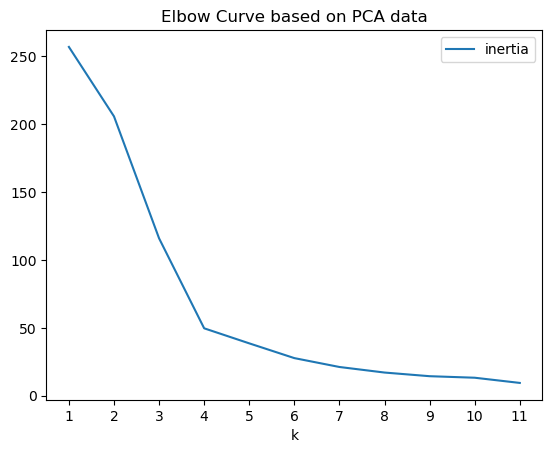

In [39]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow_2.plot.line(x="k",
                     y="inertia",
                     title="Elbow Curve based on PCA data",
                     xticks=k_values)

In [40]:
# validate rate of decrease for each K value numerically: 

k_values = df_elbow_2['k']
inertia_values = df_elbow_2['inertia']
for i in range (1,len(k_values)):
    percent_decrease = (inertia_values[i-1]-inertia_values[i]) / inertia_values[i-1]*100
    print(f"Percentage decrease from k={k_values[i-1]} to k={k_values[i]}: {percent_decrease:.2f}%")


Percentage decrease from k=1 to k=2: 19.91%
Percentage decrease from k=2 to k=3: 43.66%
Percentage decrease from k=3 to k=4: 57.15%
Percentage decrease from k=4 to k=5: 22.31%
Percentage decrease from k=5 to k=6: 28.16%
Percentage decrease from k=6 to k=7: 23.58%
Percentage decrease from k=7 to k=8: 19.31%
Percentage decrease from k=8 to k=9: 15.74%
Percentage decrease from k=9 to k=10: 7.82%
Percentage decrease from k=10 to k=11: 28.81%


#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4 is the best value for `k` when using PCA data. 


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 4 is also the best value for `k` when using the original data. However, I did notice that the elbow curve with PCA data was more clear, and 4 was the obvious choice for the k value.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [41]:
# Initialize the K-Means model using the best value for k
kpcamodel = KMeans(n_clusters=4, n_init="auto")

In [43]:
# Fit the K-Means model using the PCA data
kpcamodel.fit(crypto_pca_df)

KMeans(n_clusters=4, n_init='auto')

In [44]:
# Predict the clusters to group the cryptocurrencies using the PCA data
kpca_4 = kpcamodel.predict(crypto_pca_df)

# Print the resulting array of cluster values.
display(kpca_4[:10])

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0])

In [45]:
# Create a copy of the DataFrame with the PCA data
crypto_pca_predict_df = crypto_pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
crypto_pca_predict_df["crypto_cluster"] = kpca_4

# Display sample data
crypto_pca_predict_df.head()

,PCA1,PCA2,PCA3,crypto_cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


<Axes: xlabel='PCA1', ylabel='PCA2'>

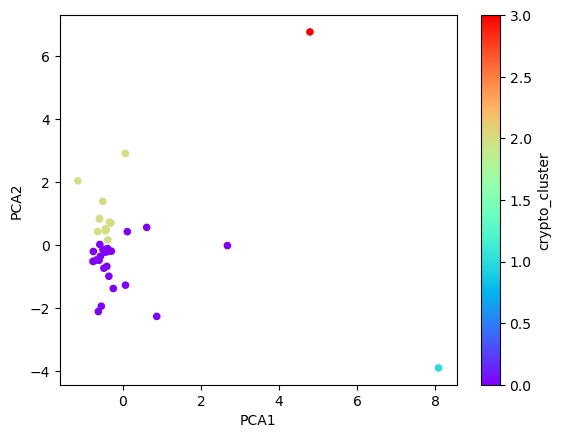

In [46]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
crypto_pca_predict_df.plot.scatter(x="PCA1",
                                   y="PCA2",
                                   c = "crypto_cluster",
                                   colormap = "rainbow")

### Determine the Weights of Each Feature on each Principal Component

In [ ]:
# Use the columns from the original scaled DataFrame as the index.


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
    